# read data

In [1]:
# load libraries
import glob
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import statsmodels.api as sm

In [2]:
# display all columns
pd.options.display.max_columns = 70
#pd.options.display.max_rows = None

In [3]:
# get lists of multiple json files
prep_data = pd.read_json("data/A20runs.json")
prep_data.head()

,gold_per_floor,floor_reached,playtime,items_purged,score,play_id,local_time,is_ascension_mode,campfire_choices,neow_cost,seed_source_timestamp,circlet_count,master_deck,relics,potions_floor_usage,damage_taken,seed_played,potions_obtained,is_trial,path_per_floor,character_chosen,items_purchased,campfire_rested,item_purchase_floors,current_hp_per_floor,gold,neow_bonus,is_prod,is_daily,chose_seed,campfire_upgraded,win_rate,timestamp,path_taken,build_version,purchased_purges,victory,max_hp_per_floor,card_choices,player_experience,relics_obtained,event_choices,is_beta,boss_relics,items_purged_floors,is_endless,potions_floor_spawned,killed_by,ascension_level,special_seed
0,"[116, 128, 128, 145, 164, 164, 199, 36, 60, 77...",57,3592,"[Strike_B, Fusion]",3387,f0e5a910-179f-4b2c-8faa-36c4b18dc596,1970-08-22 19:25:01.075911,True,"[{'data': 'Doom and Gloom', 'floor': 6.0, 'key...",NONE,0,0,"[AscendersBane, Defend_B, Defend_B, Defend_B, ...","[Snecko Eye, Boot, MealTicket, Dream Catcher, ...",[],"[{'damage': 8.0, 'enemies': '2 Louse', 'floor'...",8817479027442935808,"[{'floor': 1.0, 'key': 'SneckoOil'}, {'floor':...",False,"[M, M, ?, M, M, R, E, $, T, M, ?, R, E, M, R, ...",DEFECT,"[Loop, ClockworkSouvenir, Self Repair, Meteor ...",1,"[8, 22, 22, 30, 54, 54]","[56, 55, 55, 55, 50, 50, 25, 25, 25, 11, 11, 3...",112,BOSS_RELIC,False,False,False,6,0,2020-10-31 23:59:11,"[M, M, ?, ?, M, R, E, $, T, M, ?, R, E, M, R, ...",2020-07-30,2,True,"[71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 7...","[{'not_picked': ['Steam Power', 'Tempest', 'Go...",1711065,"[{'floor': 7.0, 'key': 'Boot'}, {'floor': 9.0,...","[{'damage_healed': 0.0, 'max_hp_gain': 0.0, 'm...",False,"[{'not_picked': ['Busted Crown', 'Astrolabe'],...","[8, 54]",False,"[1, 5, 7, 16, 18, 20, 29, 35, 42, 48, 55]",NaN,20,0.0
1,"[110, 57, 76, 88, 48, 48, 73, 22, 22, 22, 34, ...",57,2499,"[Strike_B+1, Strike_B+1]",2856,e7965be2-e720-4f70-a41f-1e102caae779,1970-08-22 19:23:51.190308,True,"[{'data': 'Sweeping Beam', 'floor': 6.0, 'key'...",NONE,0,0,"[AscendersBane, Strike_B+1, Defend_B+1, Defend...","[Calling Bell, Bag of Preparation, Cables, Win...","[56, 56, 56, 56, 56, 56, 56, 56]","[{'damage': 4.0, 'enemies': 'Jaw Worm', 'floor...",-7915356058747896832,"[{'floor': 1.0, 'key': 'DuplicationPotion'}, {...",False,"[M, ?, M, M, M, R, E, $, T, ?, M, E, E, M, R, ...",DEFECT,"[Coolheaded, OrangePellets, PreservedInsect, R...",4,"[8, 37, 37, 48, 48, 48, 48, 48, 48, 48, 54]","[60, 60, 60, 57, 35, 35, 23, 23, 23, 71, 69, 5...",57,BOSS_RELIC,False,False,False,4,0,2020-11-01 00:03:08,"[M, ?, M, M, ?, R, E, ?, T, ?, ?, E, E, ?, R, ...",2020-07-30,2,True,"[71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 73, 7...","[{'not_picked': ['Leap', 'Redo'], 'picked': 'S...",583140,"[{'floor': 0.0, 'key': 'Bag of Preparation'}, ...","[{'damage_healed': 0.0, 'max_hp_gain': 0.0, 'm...",True,"[{'not_picked': ['Sozu', 'SlaversCollar'], 'pi...","[37, 48]",False,"[1, 3, 11, 18, 21, 24, 27, 33, 35, 36, 44]",NaN,20,0.0
2,"[119, 129, 129, 149, 161, 161, 190, 210, 262, ...",57,6662,"[Strike_B, Strike_B+1]",2702,bc717009-43e1-4177-98b9-dd41fe283145,1970-08-22 19:23:51.190326,True,"[{'data': 'Darkness', 'floor': 6.0, 'key': 'SM...",NONE,0,0,"[AscendersBane, Defend_B+1, Defend_B+1, Defend...","[Nuclear Battery, Gremlin Horn, Dream Catcher,...","[56, 56]","[{'damage': 5.0, 'enemies': '2 Louse', 'floor'...",4177121344993452544,"[{'floor': 1.0, 'key': 'LiquidBronze'}, {'floo...",False,"[M, M, ?, M, M, R, E, M, T, M, M, E, ?, E, R, ...",DEFECT,"[Membership Card, Happy Flower, The Bomb, Apot...",0,"[20, 20, 20, 28, 28, 28, 37, 54]","[59, 57, 57, 60, 37, 37, 39, 45, 45, 51, 58, 6...",39,BOSS_RELIC,False,False,False,8,0,2020-11-01 00:03:26,"[M, M, ?, M, M, R, E, M, T, M, ?, E, ?, E, R, ...",2020-07-30,2,True,"[71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 7...","[{'not_picked': ['Go for the Eyes', 'Sweeping ...",201155,"[{'floor': 7.0, 'key': 'Gremlin Horn'}, {'floo...","[{'damage_healed': 0.0, 'max_hp_gain': 0.0, 'm...",False,"[{'not_picked': 

In [4]:
prep_data.shape

(7155, 50)

check number of victorious run

# create new campfire columns:
    - count campfires
    - count smiths
    - count rest
    - count recall (keys)
    - count dig
    - count purge
    - count lift

In [5]:
# count campfire rest
def camp_smith(row):
    df = pd.json_normalize(row)
    cnt = 0
    
    if df.shape[0] != 0:
        for element in df['key']:
            if element == 'SMITH':
                cnt = cnt + 1    
    return cnt
prep_data['campfire_smith'] = prep_data['campfire_choices'].apply(camp_smith)

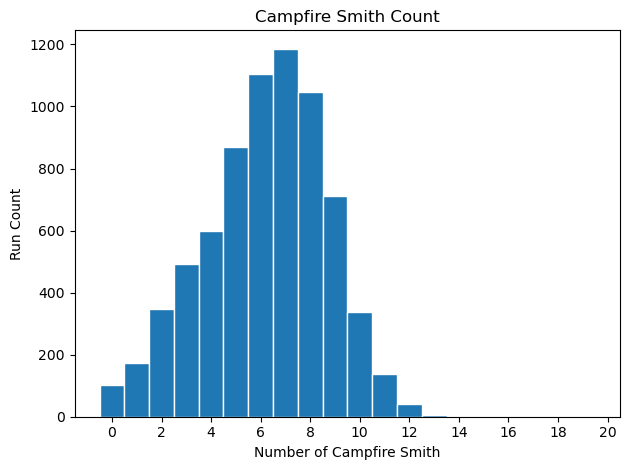

In [6]:
camp_df = prep_data["campfire_smith"]

plt.style.use('default')

fig, ax = plt.subplots()
ax.hist(camp_df, bins=np.arange(camp_df.min(), camp_df.max()+1)-0.5, edgecolor='white')
ax.set_xticks(np.arange(0, camp_df.max()+1, 2))

ax.set_xlabel("Number of Campfire Smith")
ax.set_ylabel("Run Count")

ax.set_title("Campfire Smith Count")

plt.tight_layout()

plt.show()

In [7]:
fig.savefig("img/camp_smiths.png")

In [8]:
# count campfire rest
def camp_rest(row):
    df = pd.json_normalize(row)
    cnt = 0
    if df.shape[0] != 0:
        for element in df['key']:
            if element == 'REST':
                cnt = cnt + 1    
    return cnt
prep_data['campfire_rest'] = prep_data['campfire_choices'].apply(camp_rest)

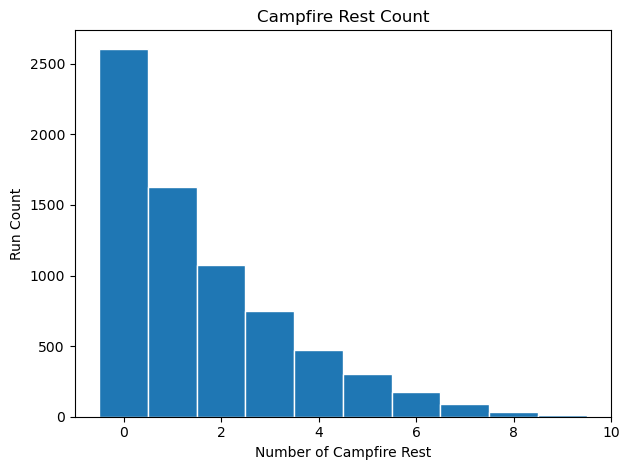

In [9]:
camp_df = prep_data["campfire_rest"]

plt.style.use('default')

fig, ax = plt.subplots()
ax.hist(camp_df, bins=np.arange(camp_df.min(), camp_df.max()+1)-0.5, edgecolor='white')
ax.set_xticks(np.arange(0, camp_df.max()+1, 2))

ax.set_xlabel("Number of Campfire Rest")
ax.set_ylabel("Run Count")

ax.set_title("Campfire Rest Count")

plt.tight_layout()

plt.show()

In [10]:
fig.savefig("img/camp_rest.png")

# Getting List of Upgraded Cards in Campfire Smiths

In [11]:
def smith_cards(row):
    df = pd.json_normalize(row)
    #lst = []
    try:
        df = df[df['key'] == 'SMITH']
        if df.shape[0] == 0:
            lst = []
        else:
            lst = df['data'].tolist()
        #dct= {i:lst.count(i) for i in lst}
    except:
        lst = []
    return lst

In [12]:
prep_data['campfire_smith_cards'] = prep_data['campfire_choices'].apply(smith_cards)

In [13]:
prep_data.head()

,gold_per_floor,floor_reached,playtime,items_purged,score,play_id,local_time,is_ascension_mode,campfire_choices,neow_cost,seed_source_timestamp,circlet_count,master_deck,relics,potions_floor_usage,damage_taken,seed_played,potions_obtained,is_trial,path_per_floor,character_chosen,items_purchased,campfire_rested,item_purchase_floors,current_hp_per_floor,gold,neow_bonus,is_prod,is_daily,chose_seed,campfire_upgraded,win_rate,timestamp,path_taken,build_version,purchased_purges,victory,max_hp_per_floor,card_choices,player_experience,relics_obtained,event_choices,is_beta,boss_relics,items_purged_floors,is_endless,potions_floor_spawned,killed_by,ascension_level,special_seed,campfire_smith,campfire_rest,campfire_smith_cards
0,"[116, 128, 128, 145, 164, 164, 199, 36, 60, 77...",57,3592,"[Strike_B, Fusion]",3387,f0e5a910-179f-4b2c-8faa-36c4b18dc596,1970-08-22 19:25:01.075911,True,"[{'data': 'Doom and Gloom', 'floor': 6.0, 'key...",NONE,0,0,"[AscendersBane, Defend_B, Defend_B, Defend_B, ...","[Snecko Eye, Boot, MealTicket, Dream Catcher, ...",[],"[{'damage': 8.0, 'enemies': '2 Louse', 'floor'...",8817479027442935808,"[{'floor': 1.0, 'key': 'SneckoOil'}, {'floor':...",False,"[M, M, ?, M, M, R, E, $, T, M, ?, R, E, M, R, ...",DEFECT,"[Loop, ClockworkSouvenir, Self Repair, Meteor ...",1,"[8, 22, 22, 30, 54, 54]","[56, 55, 55, 55, 50, 50, 25, 25, 25, 11, 11, 3...",112,BOSS_RELIC,False,False,False,6,0,2020-10-31 23:59:11,"[M, M, ?, ?, M, R, E, $, T, M, ?, R, E, M, R, ...",2020-07-30,2,True,"[71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 7...","[{'not_picked': ['Steam Power', 'Tempest', 'Go...",1711065,"[{'floor': 7.0, 'key': 'Boot'}, {'floor': 9.0,...","[{'damage_healed': 0.0, 'max_hp_gain': 0.0, 'm...",False,"[{'not_picked': ['Busted Crown', 'Astrolabe'],...","[8, 54]",False,"[1, 5, 7, 16, 18, 20, 29, 35, 42, 48, 55]",NaN,20,0.0,6,1,"[Doom and Gloom, Meteor Strike, Biased Cogniti..."
1,"[110, 57, 76, 88, 48, 48, 73, 22, 22, 22, 34, ...",57,2499,"[Strike_B+1, Strike_B+1]",2856,e7965be2-e720-4f70-a41f-1e102caae779,1970-08-22 19:23:51.190308,True,"[{'data': 'Sweeping Beam', 'floor': 6.0, 'key'...",NONE,0,0,"[AscendersBane, Strike_B+1, Defend_B+1, Defend...","[Calling Bell, Bag of Preparation, Cables, Win...","[56, 56, 56, 56, 56, 56, 56, 56]","[{'damage': 4.0, 'enemies': 'Jaw Worm', 'floor...",-7915356058747896832,"[{'floor': 1.0, 'key': 'DuplicationPotion'}, {...",False,"[M, ?, M, M, M, R, E, $, T, ?, M, E, E, M, R, ...",DEFECT,"[Coolheaded, OrangePellets, PreservedInsect, R...",4,"[8, 37, 37, 48, 48, 48, 48, 48, 48, 48, 54]","[60, 60, 60, 57, 35, 35, 23, 23, 23, 71, 69, 5...",57,BOSS_RELIC,False,False,False,4,0,2020-11-01 00:03:08,"[M, ?, M, M, ?, R, E, ?, T, ?, ?, E, E, ?, R, ...",2020-07-30,2,True,"[71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 73, 7...","[{'not_picked': ['Leap', 'Redo'], 'picked': 'S...",583140,"[{'floor': 0.0, 'key': 'Bag of Preparation'}, ...","[{'damage_healed': 0.0, 'max_hp_gain': 0.0, 'm...",True,"[{'not_picked': ['Sozu', 'SlaversCollar'], 'pi...","[37, 48]",False,"[1, 3, 11, 18, 21, 24, 27, 33, 35, 36, 44]",NaN,20,0.0,4,4,"[Sweeping Beam, Defragment, Defragment, Dualcast]"
2,"[119, 129, 129, 149, 161, 161, 190, 210, 262, ...",57,6662,"[Strike_B, Strike_B+1]",2702,bc717009-43e1-4177-98b9-dd41fe283145,1970-08-22 19:23:51.190326,True,"[{'data': 'Darkness', 'floor': 6.0, 'key': 'SM...",NONE,0,0,"[AscendersBane, Defend_B+1, Defend_B+1, Defend...","[Nuclear Battery, Gremlin Horn, Dream Catcher,...","[56, 56]","[{'damage': 5.0, 'enemies': '2 Louse', 'floor'...",4177121344993452544,"[{'floor': 1.0, 'key': 'LiquidBronze'}, {'floo...",False,"[M, M, ?, M, M, R, E, M, T, M, M, E, ?, E, R, ...",DEFECT,"[Membership Card, Happy Flower, The Bomb, Apot...",0,"[20, 20, 20, 28, 28, 28, 37, 54]","[59, 57, 57, 60, 37, 37, 39, 45, 45, 51, 58, 6...",39,BOSS_RELIC,False,False,False,8,0,2020-11-01 00:03:26,"[M, M, ?, M, M, R, E, M, T, M, ?, E, ?, E, R, ...",2020-07-30,2,True,"[71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 7...","[{'not_picked': ['Go fo

In [42]:
prep_data['campfire_choices'][0]

[{'data': 'Doom and Gloom', 'floor': 6.0, 'key': 'SMITH'},
 {'floor': 12.0, 'key': 'REST'},
 {'data': 'Meteor Strike', 'floor': 15.0, 'key': 'SMITH'},
 {'data': 'Biased Cognition', 'floor': 24.0, 'key': 'SMITH'},
 {'data': 'Loop', 'floor': 32.0, 'key': 'SMITH'},
 {'floor': 45.0, 'key': 'RECALL'},
 {'data': 'Coolheaded', 'floor': 49, 'key': 'SMITH'},
 {'data': 'Ghostly', 'floor': 53, 'key': 'SMITH'}]

In [41]:
upgraded_cards.head()

,Doom and Gloom,Meteor Strike,Biased Cognition,Loop,Coolheaded,Ghostly,Sweeping Beam,Defragment,Dualcast,Darkness,Seek,Genetic Algorithm,Echo Form,Reinforced Body,The Bomb,A Thousand Cuts,Footwork,Leg Sweep,Deadly Poison,Apotheosis,Wraith Form v2,Tactician,Acrobatics,Well Laid Plans,Terror,Blood for Blood,Carnage,Flame Barrier,Inflame,Juggernaut,Impervious,Undo,Zap,Capacitor,Twin Strike,...,FTL,Fusion,Dropkick,Reckless Charge,Defend_B,Slice,Endless Agony,DeceiveReality,Unload,Thinking Ahead,Heel Hook,Good Instincts,Jack Of All Trades,Crescendo,Bite,BootSequence,WreathOfFlame,Swivel,Evaluate,Distraction,Steam,JustLucky,Weave,Blind,Clash,Forethought,Aggregate,Auto Shields,Strike_B,Flying Knee,Hello World,Dramatic Entrance,Swift Strike,Reprogram,Stack
0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Count Items Purged, Relics, Master Deck, Items Purchased

In [14]:
# count campfire lift
def item_cnt(row):
    return len(row)
prep_data['items_purged_cnt'] = prep_data['items_purged'].apply(item_cnt)
prep_data['potions_usage_cnt'] = prep_data['potions_floor_usage'].apply(item_cnt)
prep_data['master_deck_cnt'] = prep_data['master_deck'].apply(item_cnt)
prep_data['relics_cnt'] = prep_data['relics'].apply(item_cnt)
prep_data['items_purchased_cnt'] = prep_data['items_purchased'].apply(item_cnt)

In [15]:
prep_data.head()

,gold_per_floor,floor_reached,playtime,items_purged,score,play_id,local_time,is_ascension_mode,campfire_choices,neow_cost,seed_source_timestamp,circlet_count,master_deck,relics,potions_floor_usage,damage_taken,seed_played,potions_obtained,is_trial,path_per_floor,character_chosen,items_purchased,campfire_rested,item_purchase_floors,current_hp_per_floor,gold,neow_bonus,is_prod,is_daily,chose_seed,campfire_upgraded,win_rate,timestamp,path_taken,build_version,purchased_purges,victory,max_hp_per_floor,card_choices,player_experience,relics_obtained,event_choices,is_beta,boss_relics,items_purged_floors,is_endless,potions_floor_spawned,killed_by,ascension_level,special_seed,campfire_smith,campfire_rest,campfire_smith_cards,items_purged_cnt,potions_usage_cnt,master_deck_cnt,relics_cnt,items_purchased_cnt
0,"[116, 128, 128, 145, 164, 164, 199, 36, 60, 77...",57,3592,"[Strike_B, Fusion]",3387,f0e5a910-179f-4b2c-8faa-36c4b18dc596,1970-08-22 19:25:01.075911,True,"[{'data': 'Doom and Gloom', 'floor': 6.0, 'key...",NONE,0,0,"[AscendersBane, Defend_B, Defend_B, Defend_B, ...","[Snecko Eye, Boot, MealTicket, Dream Catcher, ...",[],"[{'damage': 8.0, 'enemies': '2 Louse', 'floor'...",8817479027442935808,"[{'floor': 1.0, 'key': 'SneckoOil'}, {'floor':...",False,"[M, M, ?, M, M, R, E, $, T, M, ?, R, E, M, R, ...",DEFECT,"[Loop, ClockworkSouvenir, Self Repair, Meteor ...",1,"[8, 22, 22, 30, 54, 54]","[56, 55, 55, 55, 50, 50, 25, 25, 25, 11, 11, 3...",112,BOSS_RELIC,False,False,False,6,0,2020-10-31 23:59:11,"[M, M, ?, ?, M, R, E, $, T, M, ?, R, E, M, R, ...",2020-07-30,2,True,"[71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 7...","[{'not_picked': ['Steam Power', 'Tempest', 'Go...",1711065,"[{'floor': 7.0, 'key': 'Boot'}, {'floor': 9.0,...","[{'damage_healed': 0.0, 'max_hp_gain': 0.0, 'm...",False,"[{'not_picked': ['Busted Crown', 'Astrolabe'],...","[8, 54]",False,"[1, 5, 7, 16, 18, 20, 29, 35, 42, 48, 55]",NaN,20,0.0,6,1,"[Doom and Gloom, Meteor Strike, Biased Cogniti...",2,0,25,20,6
1,"[110, 57, 76, 88, 48, 48, 73, 22, 22, 22, 34, ...",57,2499,"[Strike_B+1, Strike_B+1]",2856,e7965be2-e720-4f70-a41f-1e102caae779,1970-08-22 19:23:51.190308,True,"[{'data': 'Sweeping Beam', 'floor': 6.0, 'key'...",NONE,0,0,"[AscendersBane, Strike_B+1, Defend_B+1, Defend...","[Calling Bell, Bag of Preparation, Cables, Win...","[56, 56, 56, 56, 56, 56, 56, 56]","[{'damage': 4.0, 'enemies': 'Jaw Worm', 'floor...",-7915356058747896832,"[{'floor': 1.0, 'key': 'DuplicationPotion'}, {...",False,"[M, ?, M, M, M, R, E, $, T, ?, M, E, E, M, R, ...",DEFECT,"[Coolheaded, OrangePellets, PreservedInsect, R...",4,"[8, 37, 37, 48, 48, 48, 48, 48, 48, 48, 54]","[60, 60, 60, 57, 35, 35, 23, 23, 23, 71, 69, 5...",57,BOSS_RELIC,False,False,False,4,0,2020-11-01 00:03:08,"[M, ?, M, M, ?, R, E, ?, T, ?, ?, E, E, ?, R, ...",2020-07-30,2,True,"[71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 73, 7...","[{'not_picked': ['Leap', 'Redo'], 'picked': 'S...",583140,"[{'floor': 0.0, 'key': 'Bag of Preparation'}, ...","[{'damage_healed': 0.0, 'max_hp_gain': 0.0, 'm...",True,"[{'not_picked': ['Sozu', 'SlaversCollar'], 'pi...","[37, 48]",False,"[1, 3, 11, 18, 21, 24, 27, 33, 35, 36, 44]",NaN,20,0.0,4,4,"[Sweeping Beam, Defragment, Defragment, Dualcast]",2,8,21,28,11
2,"[119, 129, 129, 149, 161, 161, 190, 210, 262, ...",57,6662,"[Strike_B, Strike_B+1]",2702,bc717009-43e1-4177-98b9-dd41fe283145,1970-08-22 19:23:51.190326,True,"[{'data': 'Darkness', 'floor': 6.0, 'key': 'SM...",NONE,0,0,"[AscendersBane, Defend_B+1, Defend_B+1, Defend...","[Nuclear Battery, Gremlin Horn, Dream Catcher,...","[56, 56]","[{'damage': 5.0, 'enemies': '2 Louse', 'floor'...",4177121344993452544,"[{'floor': 1.0, 'key': 'LiquidBronze'}, {'floo...",False,"[M, M, ?, M, M, R, E, M, T, M, M, E, ?, E, R, ...",DEFECT,"[Membership Card, Happy Flower, The Bomb, Apot...",0,"[20, 20, 20, 28, 28, 28, 37, 54]","[59, 57, 57, 60, 37, 37, 39, 45, 45, 51, 58, 6...",39,BOSS_RELIC,False,False,False,8,0,2020-11-01 00:03:26,"[M, M, ?, M, M, R, E, M, T, M, ?, E, ?

In [16]:
# remove + 1 card upgrade
def rem_upgrade(row):
    return [s.strip('+1') for s in row]
prep_data['campfire_smith_cards'] = prep_data['campfire_smith_cards'].apply(rem_upgrade)

In [17]:
# remove + X searing card upgrade
import re
def rem_searing_upgrade(row):
    return [re.sub('\+\d+', '+X', s) for s in row]
prep_data['campfire_smith_cards'] = prep_data['campfire_smith_cards'].apply(rem_searing_upgrade)

In [18]:
# create master deck dictionary | items: count 
def card_dict_count(row):
    return {i:row.count(i) for i in row}
prep_data['smith_cards_count'] = prep_data['campfire_smith_cards'].apply(card_dict_count)

In [19]:
upgraded_cards = pd.DataFrame.from_dict(list(prep_data.smith_cards_count))

In [20]:
upgraded_cards.shape

(7155, 340)

In [21]:
char = prep_data['character_chosen']

In [22]:
upgraded_char_cnt = pd.concat([char, upgraded_cards], axis = 1).fillna(0).groupby('character_chosen').agg('sum')

In [23]:
upgraded_char_cnt['character_chosen'] = upgraded_char_cnt.index
top_upgraded = upgraded_char_cnt.melt('character_chosen', var_name='item', value_name='count')
top_upgraded = top_upgraded.sort_values(by = ['count'], ascending = True).reset_index(drop = True)

In [24]:
top_upgraded[(top_upgraded['character_chosen'] == 'IRONCLAD') & (top_upgraded['count'] != 0)].tail(10)

,character_chosen,item,count
1339,IRONCLAD,True Grit,490.0
1341,IRONCLAD,Barricade,521.0
1342,IRONCLAD,Dark Embrace,523.0
1343,IRONCLAD,Shockwave,544.0
1345,IRONCLAD,Body Slam,546.0
1347,IRONCLAD,Offering,568.0
1350,IRONCLAD,Searing Blow+X,627.0
1351,IRONCLAD,Bash,634.0
1356,IRONCLAD,Armaments,722.0
1359,IRONCLAD,Feel No Pain,1009.0


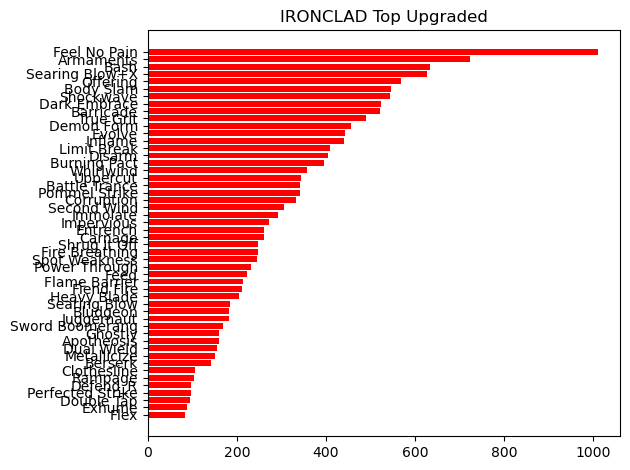

In [25]:
character = 'IRONCLAD'

df = top_upgraded[top_upgraded['character_chosen'] == character].tail(50)

#plt.style.use('fivethirtyeight')

fig, ax = plt.subplots()
ax.barh(df['item'], df['count'], color = 'red')
ax.set_title("{} Top Upgraded".format(character))

plt.tight_layout()

plt.show()

In [26]:
fig.set_size_inches([7,12])
fig.savefig("img/upgraded_ironclad.png")

In [27]:
top_upgraded[(top_upgraded['character_chosen'] == 'THE_SILENT') & (top_upgraded['count'] != 0)].tail(10)

,character_chosen,item,count
1316,THE_SILENT,Crippling Poison,307.0
1317,THE_SILENT,Tactician,317.0
1318,THE_SILENT,Bouncing Flask,320.0
1340,THE_SILENT,Wraith Form v2,512.0
1344,THE_SILENT,Well Laid Plans,545.0
1346,THE_SILENT,Acrobatics,564.0
1349,THE_SILENT,Noxious Fumes,582.0
1352,THE_SILENT,Catalyst,641.0
1354,THE_SILENT,Footwork,670.0
1355,THE_SILENT,Neutralize,698.0


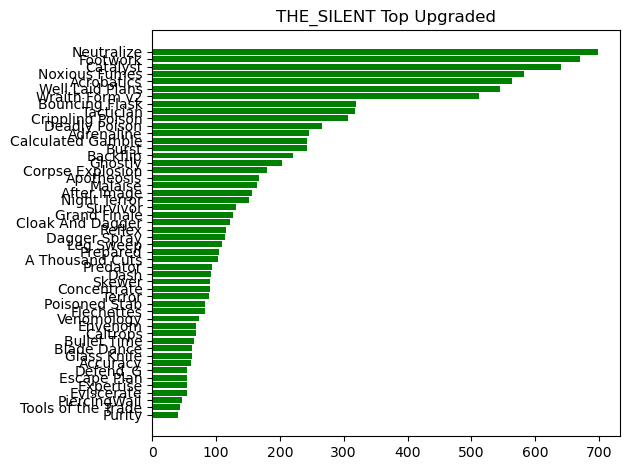

In [28]:
character = 'THE_SILENT'

df = top_upgraded[top_upgraded['character_chosen'] == character].tail(50)

plt.style.use('default')

fig, ax = plt.subplots()
ax.barh(df['item'], df['count'], color = 'green')
ax.set_title("{} Top Upgraded".format(character))

plt.tight_layout()

plt.show()

In [29]:
fig.set_size_inches([7,12])
fig.savefig("img/upgraded_silent.png")

In [30]:
top_upgraded[(top_upgraded['character_chosen'] == 'DEFECT') & (top_upgraded['count'] != 0)].tail(10)

,character_chosen,item,count
1291,DEFECT,Buffer,211.0
1293,DEFECT,Fission,215.0
1305,DEFECT,Seek,257.0
1311,DEFECT,Loop,275.0
1312,DEFECT,Capacitor,290.0
1315,DEFECT,Dualcast,307.0
1320,DEFECT,Zap,334.0
1330,DEFECT,Biased Cognition,393.0
1348,DEFECT,Coolheaded,578.0
1357,DEFECT,Defragment,917.0


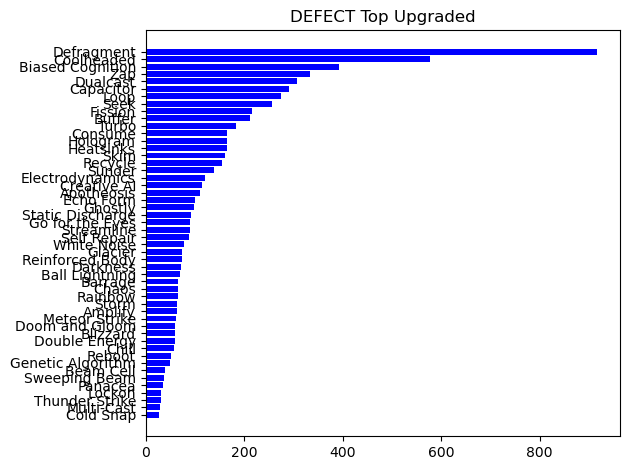

In [31]:
character = 'DEFECT'

df = top_upgraded[top_upgraded['character_chosen'] == character].tail(50)

plt.style.use('default')

fig, ax = plt.subplots()
ax.barh(df['item'], df['count'], color = 'blue')
ax.set_title("{} Top Upgraded".format(character))

plt.tight_layout()

plt.show()

In [32]:
fig.set_size_inches([7,12])
fig.savefig("img/upgraded_defect.png")

In [33]:
top_upgraded[(top_upgraded['character_chosen'] == 'WATCHER') & (top_upgraded['count'] != 0)].tail(10)

,character_chosen,item,count
1308,WATCHER,Ragnarok,265.0
1322,WATCHER,Vault,341.0
1325,WATCHER,Wallop,344.0
1326,WATCHER,MentalFortress,354.0
1328,WATCHER,Scrawl,373.0
1329,WATCHER,Fasting2,376.0
1334,WATCHER,Tantrum,434.0
1338,WATCHER,Adaptation,488.0
1353,WATCHER,TalkToTheHand,656.0
1358,WATCHER,Eruption,985.0


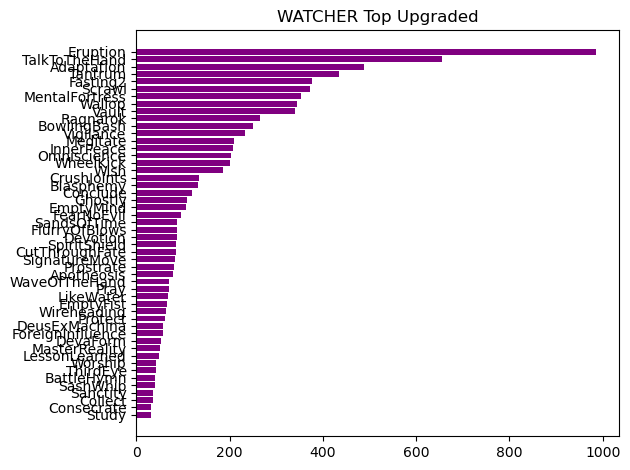

In [34]:
character = 'WATCHER'

df = top_upgraded[top_upgraded['character_chosen'] == character].tail(50)

plt.style.use('default')

fig, ax = plt.subplots()
ax.barh(df['item'], df['count'], color = 'purple')
ax.set_title("{} Top Upgraded".format(character))

plt.tight_layout()

plt.show()

In [35]:
fig.set_size_inches([7,12])
fig.savefig("img/upgraded_watcher.png")

In [36]:
top_upgraded.to_csv("data/top_upgraded.csv", index = False)

# Win Rate of Upgraded Cards
All Cards

In [40]:
all_data = pd.read_json("data/A20runsAll.json")
#prep_data = pd.read_csv("data/A20runs.csv")
all_data.head()

,gold_per_floor,floor_reached,playtime,items_purged,score,play_id,local_time,is_ascension_mode,campfire_choices,neow_cost,seed_source_timestamp,circlet_count,master_deck,relics,potions_floor_usage,damage_taken,seed_played,potions_obtained,is_trial,path_per_floor,character_chosen,items_purchased,campfire_rested,item_purchase_floors,current_hp_per_floor,gold,neow_bonus,is_prod,is_daily,chose_seed,campfire_upgraded,win_rate,timestamp,path_taken,build_version,purchased_purges,victory,max_hp_per_floor,card_choices,player_experience,relics_obtained,event_choices,is_beta,boss_relics,items_purged_floors,is_endless,potions_floor_spawned,killed_by,ascension_level,special_seed
0,"[99, 99]",0,4762,[],0,5bb86b83-7948-404f-af21-b9393b1b9853,1970-08-22 19:25:01.000017,True,[],NONE,415223891487200,0,"[AscendersBane, Strike_G, Strike_G, Strike_G, ...",[Runic Dome],[],[],-6923904805984939008,[],False,[],THE_SILENT,[],0,[],"[59, 59]",99,BOSS_RELIC,False,False,False,0,0,2020-11-01 06:00:17,[],2020-07-30,0,False,"[66, 66]",[],3967369,[],[],False,[],[],False,[],None,20,NaN
1,"[217, 229, 229, 240, 60, 88, 88, 114, 140, 160...",25,1566,[],490,4ae90c61-62da-42af-a937-27a6b963dce7,1970-08-22 19:23:51.185748,True,"[{'data': 'Glass Knife', 'floor': 7, 'key': 'S...",NONE,1490222624032500,0,"[AscendersBane, Survivor, Neutralize+1, Endles...","[Ring of the Snake, Vajra, Potion Belt, Happy ...","[6, 13, 21, 23, 23, 23, 25]","[{'damage': 0, 'enemies': '2 Louse', 'floor': ...",-793942644752918272,"[{'floor': 1, 'key': 'DistilledChaos'}, {'floo...",False,"[M, M, ?, M, $, E, R, E, T, M, M, R, E, M, R, ...",THE_SILENT,"[Glass Knife, Orichalcum, Footwork, Cloak And ...",2,"[5, 19, 19, 19]","[59, 55, 60, 59, 59, 37, 37, 31, 31, 19, 19, 1...",117,HUNDRED_GOLD,False,False,False,2,0,2020-10-31 23:57:48,"[M, M, ?, M, $, E, R, E, T, M, M, R, E, M, R, ...",2020-07-30,0,False,"[66, 66, 71, 71, 71, 71, 71, 71, 71, 71, 71, 7...","[{'not_picked': ['Catalyst', 'Deflect'], 'pick...",868643,"[{'floor': 6, 'key': 'Vajra'}, {'floor': 8, 'k...","[{'damage_healed': 0, 'gold_gain': 0, 'player_...",False,"[{'not_picked': ['Tiny House', 'Empty Cage'], ...",[],False,"[1, 2, 8, 10, 23]",Shelled Parasite and Fungi,20,NaN
2,"[112, 131, 146, 71, 71, 71, 71, 103, 182, 182,...",52,3378,"[Defend_G, Strike_G]",2166,a99d2f27-b22d-4f44-99e1-c8cdea4bc503,1970-08-22 19:23:51.195748,True,"[{'data': 'Cloak And Dagger', 'floor': 6.0, 'k...",NONE,0,0,"[AscendersBane, Strike_G, Strike_G, Strike_G, ...","[Ring of the Snake, TungstenRod, Bottled Light...","[51, 51]","[{'damage': 0.0, 'enemies': '2 Louse', 'floor'...",1733986337950607104,"[{'floor': 1.0, 'key': 'SteroidPotion'}, {'flo...",False,"[M, M, M, ?, ?, R, M, E, T, R, M, R, M, M, R, ...",THE_SILENT,"[Apotheosis, Ginger, Frozen Egg 2]",1,"[19, 44, 44]","[59, 53, 51, 51, 51, 51, 51, 15, 15, 15, 16, 1...",135,ONE_RANDOM_RARE_CARD,False,False,False,8,0,2020-10-31 23:57:48,"[M, M, M, ?, ?, R, M, E, T, R, M, R, M, ?, R, ...",2020-07-30,2,True,"[66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 71, 7...","[{'not_picked': ['Endless Agony', 'Blade Dance...",783412,"[{'floor': 8.0, 'key': 'TungstenRod'}, {'floor...","[{'cards_removed': ['Defend_G'], 'damage_heale...",True,"[{'not_picked': ['Velvet Choker', 'Pandora's B...","[19, 44]",False,"[1, 3, 8, 11, 16, 18, 21, 28, 31, 37, 41, 45, ...",None,20,0.0
3,"[111, 122, 122, 139, 159, 159, 159]",6,199,[],76,f8cb4842-c478-4b91-a3ce-4a0c936cd7c4,1970-08-22 19:23:51.185752,True,[],NONE,242859897901300,0,"[AscendersBane, Strike_B, Strike_B, Strike_B, ...","[Cracked Core, WarpedTongs]",[],"[{'damage': 13, 'enemies': '2 Louse', 'floor':...",-5088283886889387008,"[{'floor': 1, 'key': 'BlessingOfTheForge'}]",False,"[M, M, ?, M, M, E]",DEFECT,[],0,[],"[51, 50, 50, 40, 3, 0, 0]",159,THREE_CARDS,False,False,False,0,0,2020-10-31 23:57:52,"[M, M, ?, M, M, E]",2020-07-30,0,False,"[71, 71, 71, 71, 71, 71, 71]","[{'not_picked': ['Leap', 'Conserve Battery'], ...",519397,[],"[{'damage_healed': 0, 'gold_gain': 0, 'player_...",True,[],[],Fa

In [41]:
all_data['campfire_smith_cards'] = all_data['campfire_choices'].apply(smith_cards)

In [42]:
# remove + 1 card upgrade
all_data['campfire_smith_cards'] = all_data['campfire_smith_cards'].apply(rem_upgrade)

In [43]:
# remove + X searing card upgrade
all_data['campfire_smith_cards'] = all_data['campfire_smith_cards'].apply(rem_searing_upgrade)

In [44]:
# create master deck dictionary | items: count 
all_data['smith_cards_count'] = all_data['campfire_smith_cards'].apply(card_dict_count)

In [45]:
all_upgraded_cards = pd.DataFrame.from_dict(list(all_data.smith_cards_count))

In [46]:
all_upgraded_cards[all_upgraded_cards >= 1] = 1

In [47]:
all_char = all_data['character_chosen']

In [48]:
all_victory = all_data['victory']

In [49]:
all_upgraded_cards.shape

(238579, 341)

In [50]:
all_upgraded_char = pd.concat([all_char, all_victory, all_upgraded_cards], axis = 1)

In [51]:
all_upgraded_char.columns[:5]

Index(['character_chosen', 'victory', 'Glass Knife', 'Neutralize',
       'Cloak And Dagger'],
      dtype='object')

In [52]:
#upgraded_char_cnt['character_chosen'] = upgraded_char_cnt.index
ind_upgraded_char = all_upgraded_char.melt(['character_chosen', 'victory'], var_name='item', value_name='count')
#ind_upgraded = ind_upgraded.sort_values(by = ['count'], ascending = True).reset_index(drop = True)

In [53]:
ind_upgraded_char.shape

(81355439, 4)

In [54]:
ind_upgraded_char = ind_upgraded_char.dropna(subset=['count'])
ind_upgraded_char.shape

(427687, 4)

In [55]:
ind_upgraded_char.head()

,character_chosen,victory,item,count
1,THE_SILENT,False,Glass Knife,1.0
21,THE_SILENT,False,Glass Knife,1.0
567,THE_SILENT,False,Glass Knife,1.0
584,THE_SILENT,False,Glass Knife,1.0
586,THE_SILENT,False,Glass Knife,1.0


In [56]:
ind_upgraded_char = ind_upgraded_char.drop('count', 1)

In [57]:
win_upgraded_char = ind_upgraded_char.groupby(['character_chosen', 'item']).agg('mean')

In [58]:
top_win_upgraded = win_upgraded_char.sort_values(by = ['victory'], ascending = True).reset_index()
top_win_upgraded.rename(columns={'victory': 'win_percent'}, inplace =True)
top_win_upgraded['win_percent'] = top_win_upgraded['win_percent'] * 100
top_win_upgraded['win_percent'] = np.round(top_win_upgraded['win_percent'], 2)
top_win_upgraded.tail()

,character_chosen,item,win_percent
769,WATCHER,Coolheaded,100.0
770,WATCHER,Meteor Strike,100.0
771,IRONCLAD,Heatsinks,100.0
772,THE_SILENT,DeceiveReality,100.0
773,IRONCLAD,Wraith Form v2,100.0


In [59]:
top_win_upgraded.head()

,character_chosen,item,win_percent
0,DEFECT,Adrenaline,0.0
1,IRONCLAD,Undo,0.0
2,IRONCLAD,ThirdEye,0.0
3,IRONCLAD,Terror,0.0
4,IRONCLAD,Tempest,0.0


In [60]:
# left join top_upgraded with top_win_upgraded
freq_win_upgraded  = pd.merge(top_upgraded, top_win_upgraded, on=['character_chosen', 'item'], how = 'left')
freq_win_upgraded.tail(20)

,character_chosen,item,count,win_percent
1340,THE_SILENT,Wraith Form v2,512.0,27.03
1341,IRONCLAD,Barricade,521.0,25.43
1342,IRONCLAD,Dark Embrace,523.0,28.93
1343,IRONCLAD,Shockwave,544.0,17.65
1344,THE_SILENT,Well Laid Plans,545.0,25.65
1345,IRONCLAD,Body Slam,546.0,14.76
1346,THE_SILENT,Acrobatics,564.0,30.57
1347,IRONCLAD,Offering,568.0,29.91
1348,DEFECT,Coolheaded,578.0,14.74
1349,THE_SILENT,Noxious Fumes,582.0,8.97


In [61]:
freq_win_upgraded[(freq_win_upgraded['character_chosen'] == 'IRONCLAD') & (freq_win_upgraded['count'] != 0)].tail(10)

,character_chosen,item,count,win_percent
1339,IRONCLAD,True Grit,490.0,11.78
1341,IRONCLAD,Barricade,521.0,25.43
1342,IRONCLAD,Dark Embrace,523.0,28.93
1343,IRONCLAD,Shockwave,544.0,17.65
1345,IRONCLAD,Body Slam,546.0,14.76
1347,IRONCLAD,Offering,568.0,29.91
1350,IRONCLAD,Searing Blow+X,627.0,12.78
1351,IRONCLAD,Bash,634.0,6.13
1356,IRONCLAD,Armaments,722.0,10.11
1359,IRONCLAD,Feel No Pain,1009.0,33.65


In [62]:
freq_win_upgraded[(freq_win_upgraded['character_chosen'] == 'THE_SILENT') & (freq_win_upgraded['count'] != 0)].tail(10)

,character_chosen,item,count,win_percent
1316,THE_SILENT,Crippling Poison,307.0,10.67
1317,THE_SILENT,Tactician,317.0,29.27
1318,THE_SILENT,Bouncing Flask,320.0,9.43
1340,THE_SILENT,Wraith Form v2,512.0,27.03
1344,THE_SILENT,Well Laid Plans,545.0,25.65
1346,THE_SILENT,Acrobatics,564.0,30.57
1349,THE_SILENT,Noxious Fumes,582.0,8.97
1352,THE_SILENT,Catalyst,641.0,16.05
1354,THE_SILENT,Footwork,670.0,12.29
1355,THE_SILENT,Neutralize,698.0,6.86


In [63]:
freq_win_upgraded[(freq_win_upgraded['character_chosen'] == 'DEFECT') & (freq_win_upgraded['count'] != 0)].tail(10)

,character_chosen,item,count,win_percent
1291,DEFECT,Buffer,211.0,14.84
1293,DEFECT,Fission,215.0,14.44
1305,DEFECT,Seek,257.0,22.01
1311,DEFECT,Loop,275.0,9.65
1312,DEFECT,Capacitor,290.0,13.71
1315,DEFECT,Dualcast,307.0,5.80
1320,DEFECT,Zap,334.0,3.96
1330,DEFECT,Biased Cognition,393.0,21.87
1348,DEFECT,Coolheaded,578.0,14.74
1357,DEFECT,Defragment,917.0,10.58


In [64]:
freq_win_upgraded[(freq_win_upgraded['character_chosen'] == 'WATCHER') & (freq_win_upgraded['count'] != 0)].tail(10)

,character_chosen,item,count,win_percent
1308,WATCHER,Ragnarok,265.0,28.11
1322,WATCHER,Vault,341.0,30.65
1325,WATCHER,Wallop,344.0,25.02
1326,WATCHER,MentalFortress,354.0,31.97
1328,WATCHER,Scrawl,373.0,40.60
1329,WATCHER,Fasting2,376.0,39.39
1334,WATCHER,Tantrum,434.0,31.67
1338,WATCHER,Adaptation,488.0,33.38
1353,WATCHER,TalkToTheHand,656.0,25.73
1358,WATCHER,Eruption,985.0,12.83


# Plot Upgraded Cards | Freq & Win rate

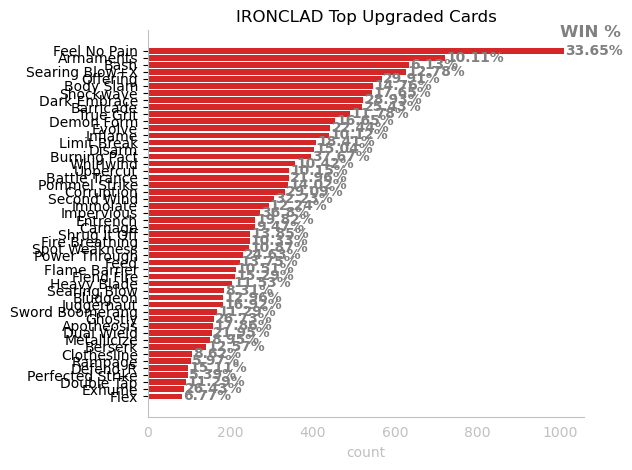

In [65]:
character = 'IRONCLAD'

df = freq_win_upgraded[freq_win_upgraded['character_chosen'] == character].tail(50)
df.index = df['item']

plt.style.use('default')

fig, ax = plt.subplots()
ax.barh(df['item'], df['count'], color = 'tab:red')
ax.set_title("{} Top Upgraded Cards".format(character))

for i, v in enumerate(df['count']):
    ax.text(v + 3, i, str(df['win_percent'][i]) + "%", color='grey', fontweight='bold', fontsize=10, ha='left', va='center')

ax.set_xlabel("count")
    
# remove spines top and right
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

# remove xticks
ax.xaxis.set_ticks_position('none')     

# change color of axis, ticks
ax_tick_col = "silver"
ax.spines['bottom'].set_color(ax_tick_col)
ax.spines['left'].set_color(ax_tick_col)

ax.xaxis.label.set_color(ax_tick_col)
ax.tick_params(axis='x', colors= ax_tick_col)

ax.text(s = "WIN %", y = 51, x = 1000, 
                         fontdict = {'family': 'sans-serif',
                                    'color':  'grey',
                                    'fontweight':  'bold',
                                    'size': 12
                                    }) 

plt.tight_layout()

plt.show()

In [66]:
fig.set_size_inches([7,12])
fig.savefig("img/upgraded_ironclad.png")

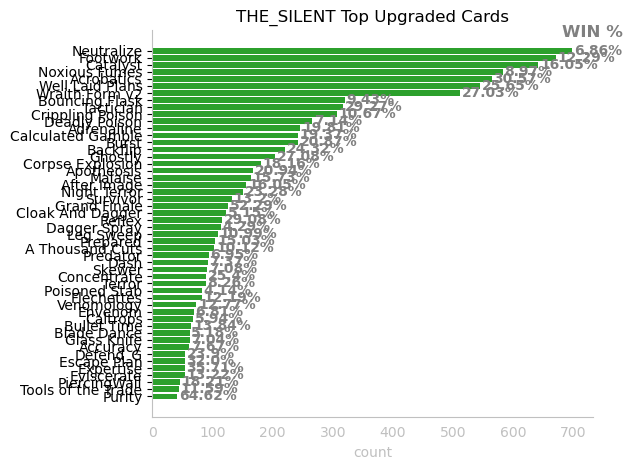

In [67]:
character = 'THE_SILENT'

df = freq_win_upgraded[freq_win_upgraded['character_chosen'] == character].tail(50)
df.index = df['item']

plt.style.use('default')

fig, ax = plt.subplots()
ax.barh(df['item'], df['count'], color = 'tab:green')
ax.set_title("{} Top Upgraded Cards".format(character))

for i, v in enumerate(df['count']):
    ax.text(v + 3, i, str(df['win_percent'][i]) + "%", color='grey', fontweight='bold', fontsize=10, ha='left', va='center')

ax.set_xlabel("count")
    
# remove spines top and right
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

# remove xticks
ax.xaxis.set_ticks_position('none')     

# change color of axis, ticks
ax_tick_col = "silver"
ax.spines['bottom'].set_color(ax_tick_col)
ax.spines['left'].set_color(ax_tick_col)

ax.xaxis.label.set_color(ax_tick_col)
ax.tick_params(axis='x', colors= ax_tick_col)

ax.text(s = "WIN %", y = 51, x = 680, 
                         fontdict = {'family': 'sans-serif',
                                    'color':  'grey',
                                    'fontweight':  'bold',
                                    'size': 12
                                    }) 

plt.tight_layout()

plt.show()

In [68]:
fig.set_size_inches([7,12])
fig.savefig("img/upgraded_silent.png")

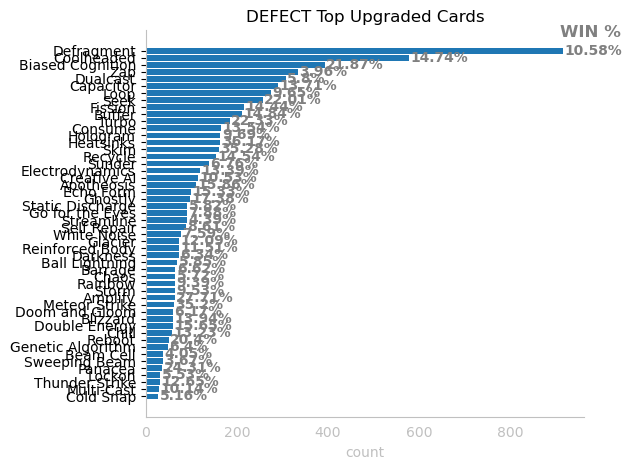

In [69]:
character = 'DEFECT'

df = freq_win_upgraded[freq_win_upgraded['character_chosen'] == character].tail(50)
df.index = df['item']

plt.style.use('default')

fig, ax = plt.subplots()
ax.barh(df['item'], df['count'], color = 'tab:blue')
ax.set_title("{} Top Upgraded Cards".format(character))

for i, v in enumerate(df['count']):
    ax.text(v + 3, i, str(df['win_percent'][i]) + "%", color='grey', fontweight='bold', fontsize=10, ha='left', va='center')

ax.set_xlabel("count")
    
# remove spines top and right
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

# remove xticks
ax.xaxis.set_ticks_position('none')     

# change color of axis, ticks
ax_tick_col = "silver"
ax.spines['bottom'].set_color(ax_tick_col)
ax.spines['left'].set_color(ax_tick_col)

ax.xaxis.label.set_color(ax_tick_col)
ax.tick_params(axis='x', colors= ax_tick_col)

ax.text(s = "WIN %", y = 51, x = 910, 
                         fontdict = {'family': 'sans-serif',
                                    'color':  'grey',
                                    'fontweight':  'bold',
                                    'size': 12
                                    }) 

plt.tight_layout()

plt.show()

In [70]:
fig.set_size_inches([7,12])
fig.savefig("img/upgraded_defect.png")

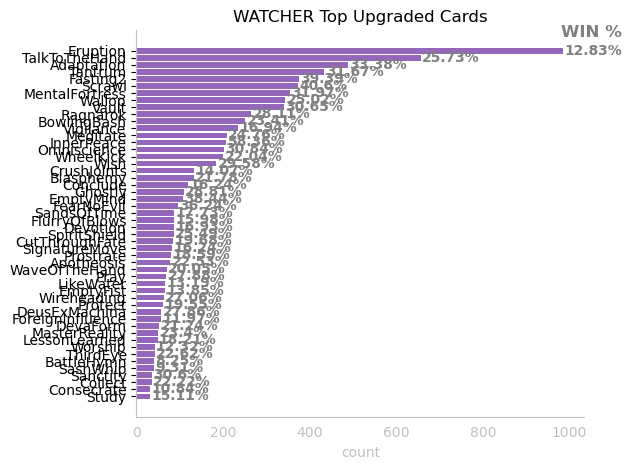

In [71]:
character = 'WATCHER'

df = freq_win_upgraded[freq_win_upgraded['character_chosen'] == character].tail(50)
df.index = df['item']

plt.style.use('default')

fig, ax = plt.subplots()
ax.barh(df['item'], df['count'], color = 'tab:purple')
ax.set_title("{} Top Upgraded Cards".format(character))

for i, v in enumerate(df['count']):
    ax.text(v + 3, i, str(df['win_percent'][i]) + "%", color='grey', fontweight='bold', fontsize=10, ha='left', va='center')

ax.set_xlabel("count")
    
# remove spines top and right
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

# remove xticks
ax.xaxis.set_ticks_position('none')     

# change color of axis, ticks
ax_tick_col = "silver"
ax.spines['bottom'].set_color(ax_tick_col)
ax.spines['left'].set_color(ax_tick_col)

ax.xaxis.label.set_color(ax_tick_col)
ax.tick_params(axis='x', colors= ax_tick_col)

ax.text(s = "WIN %", y = 51, x = 980, 
                         fontdict = {'family': 'sans-serif',
                                    'color':  'grey',
                                    'fontweight':  'bold',
                                    'size': 12
                                    }) 

plt.tight_layout()

plt.show()

In [72]:
fig.set_size_inches([7,12])
fig.savefig("img/upgraded_watcher.png")

In [73]:
freq_win_upgraded.to_csv("data/top_upgraded.csv", index = False)